In [179]:
 class Currency:
     def __init__(self, name, code):
         self.name = name
         self.code = code

from enum import Enum
class Region(Enum):
    AFRICA = 'Africa'
    AMERICA = 'America'
    ASIA = 'Asia'
    EUROPE = 'Europe'
    OCEANIA = 'Oceania'

class Direction(Enum):
    LEFT = 'Left'
    RIGHT = 'Right'

class Language:
    def __init__(self, name):
        self.name = name

class Country:
    def __init__(self, official_name, common_name, capital, region, area, population, languages, currencies, driving_direction, land_locked, un_member):
        self.official_name = official_name
        self.common_name = common_name
        self.capital = capital
        self.region = region
        self.area = area
        self.population = population
        self.languages = languages
        self.currencies = currencies
        self.driving_direction = driving_direction
        self.land_locked = land_locked
        self.un_member = un_member


import requests
def countries():
    url = 'https://restcountries.com/v3.1/all'
    response = requests.get(url)
    countries_info = response.json()
    countries_list = []
    
    for country_info in countries_info:
        country = Country (
            official_name= country_info.get('official_name'),
            common_name= country_info.get('name').get('common'),
            capital= country_info.get('capital'),
            region = country_info.get('region'),
            area = country_info.get('area'),
            population = country_info.get('population'),
            languages = country_info.get('languages', {}),
            currencies = country_info.get('currencies', []),
            driving_direction = country_info.get('car').get('side'),
            land_locked = country_info.get('landlocked'),
            un_member = country_info.get('unMember')
                )
        countries_list.append(country)
    return countries_list

def countries_per_region(region):
    url = 'https://restcountries.com/v3.1/region/' + region
    response = requests.get(url)
    countries_info = response.json()
    countries_in_region = []


    for country_info in countries_info:
        country = Country (
            official_name= country_info.get('official_name'),
            common_name= country_info.get('name').get('common'),
            capital= country_info.get('capital'),
            region = country_info.get('region'),
            area = country_info.get('area'),
            population = country_info.get('population'),
            languages = country_info.get('languages', {}),
            currencies = country_info.get('currencies', []),
            driving_direction = country_info.get('car').get('side'),
            land_locked = country_info.get('landlocked'),
            un_member = country_info.get('unMember')
                )
        countries_in_region.append(country)
    return countries_in_region

def country_for_name(name:str):
    url = 'https://restcountries.com/v3.1/name/' + name
    response = requests.get(url)
    countries_info = response.json()
    countries_name = []


    for country_info in countries_info:
        country = Country (
            official_name= country_info.get('official_name'),
            common_name= country_info.get('name').get('common'),
            capital= country_info.get('capital'),
            region = country_info.get('region'),
            area = country_info.get('area'),
            population = country_info.get('population'),
            languages = country_info.get('languages', {}),
            currencies = country_info.get('currencies', []),
            driving_direction = country_info.get('car').get('side'),
            land_locked = country_info.get('landlocked'),
            un_member = country_info.get('unMember')
                )
        countries_name.append(country)
    return countries_name

def countries_for_language(language_name):
    url = 'https://restcountries.com/v3.1/lang/' + language_name
    response = requests.get(url)
    countries_info = response.json()
    countries_languages = []

    for country_info in countries_info:
        country = Country (
            official_name= country_info.get('official_name'),
            common_name= country_info.get('name').get('common'),
            capital= country_info.get('capital'),
            region = country_info.get('region'),
            area = country_info.get('area'),
            population = country_info.get('population'),
            languages = country_info.get('languages', {}),
            currencies = country_info.get('currencies', []),
            driving_direction = country_info.get('car').get('side'),
            land_locked = country_info.get('landlocked'),
            un_member = country_info.get('unMember')
        )
        countries_languages.append(country)
    return  countries_languages
    
# 6. To the class `Country` add a function called `countries` which has no arguments and performs and API request to obtain the list of all countries. The function shall return a `List<Country>`.

# 7. To the class `Country` add a function called `countries_per_region` which has one argument of type `Region`. The function shall perform an API request and return a `List<Country>` with all the countries in the provided region.

# 8. To the class `Country` add a function named `country_for_name` which has one argument called `name` of type `String`. The fuction shall perform an API request to return a `Country` object with all the information of the provided country name.

# 9. To the class `Country` add a function called `countries_for_language` which has one argument called `language_name` of type `String`. The function shall perform an API request and returns all the countries that speak the provided language.



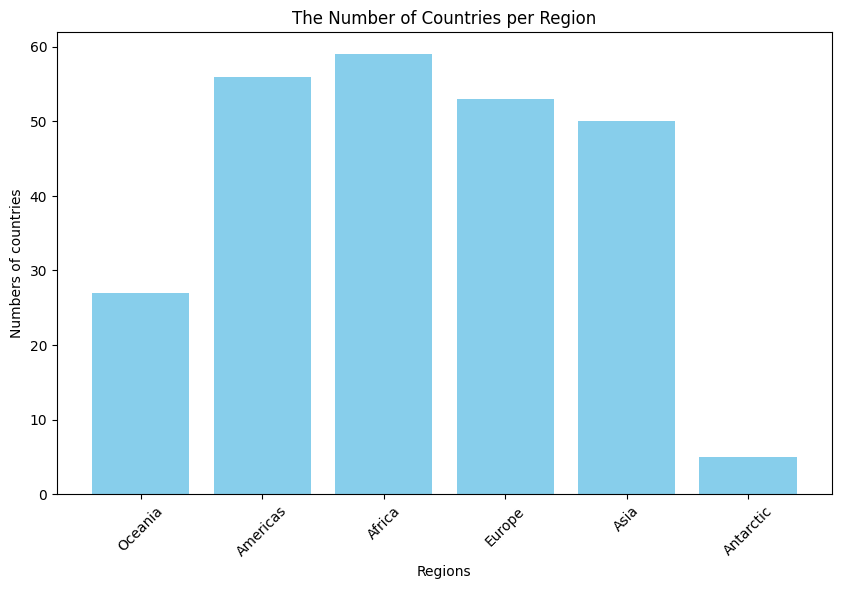

In [89]:
# 1. Create a histogram showing the number of countries per region.

import matplotlib.pyplot as plt
from collections import Counter

countries_list = countries()

regions = [
    country.region
    for country in countries_list
]

regions_count = Counter(regions)


plt.figure(figsize = (10, 6))
plt.bar(regions_count.keys(), regions_count.values(), color='skyblue')
plt.xlabel('Regions')
plt.ylabel('Numbers of countries')
plt.title('The Number of Countries per Region')
plt.xticks(rotation = 45)
plt.show()



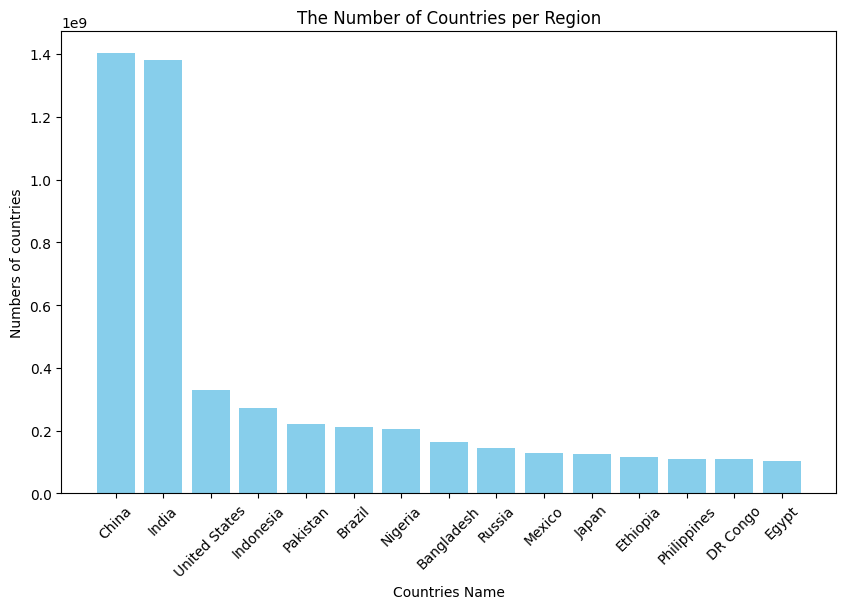

In [99]:
# 2. Create a histogram showing the 15 countries with the largest population.
import matplotlib.pyplot as plt
from collections import Counter

countries_list = countries()

largest_population_countries = {country.common_name: country.population for country in countries_list}
sorted_dict = sorted(largest_population_countries.items(), key=lambda x: x[1], reverse=True)
top15 = sorted_dict[:15]
top15_dict = dict(top15)

plt.figure(figsize = (10, 6))
plt.bar(top15_dict.keys(), top15_dict.values(), color='skyblue')
plt.xlabel('Countries Name')
plt.ylabel('Numbers of countries')
plt.title('The Number of Countries per Region')
plt.xticks(rotation = 45)
plt.show()


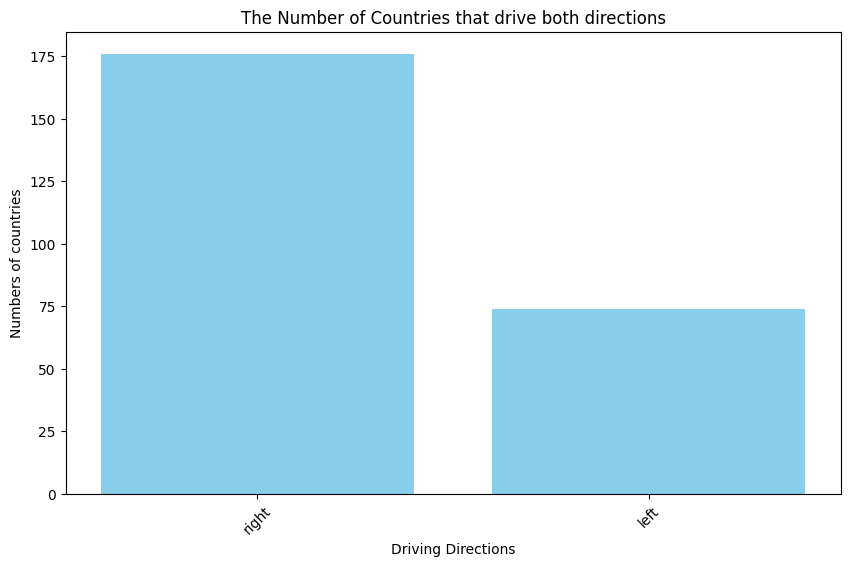

In [123]:
# 3. Create a histogram showing the number of countries that drive in the right and left direction.

import matplotlib.pyplot as plt
from collections import Counter



countries_list = countries()


driving_directions = [country.driving_direction for country in countries_list if country.driving_direction == 'left' or country.driving_direction == 'right']

side_counts = Counter(driving_directions)


plt.figure(figsize = (10, 6))
plt.bar(side_counts.keys(), side_counts.values(), color='skyblue')
plt.xlabel('Driving Directions')
plt.ylabel('Numbers of countries')
plt.title('The Number of Countries that drive both directions')
plt.xticks(rotation = 45)
plt.show()



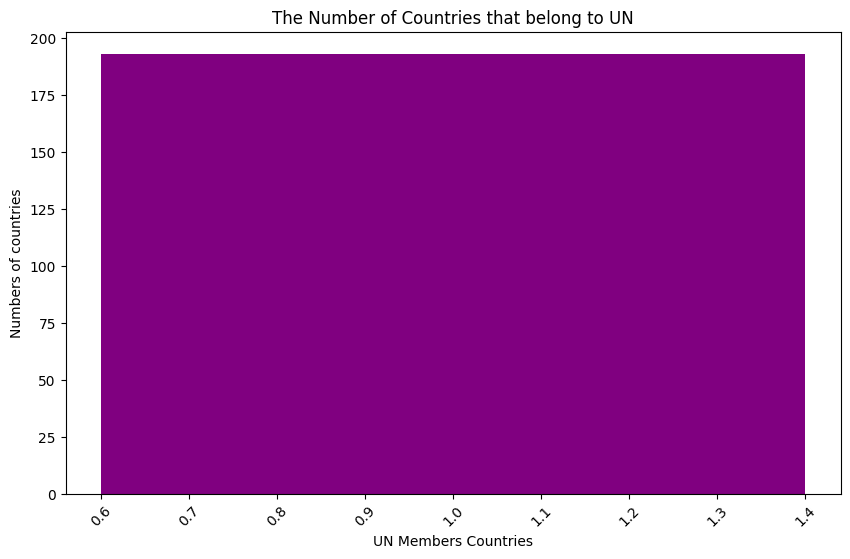

In [134]:
# 4. Create a histogram showing the number of countries that belong to the UN.

countries_list = countries()
unmember_countries = [country.un_member for country in countries_list if country.un_member]
unmember_countries_counts = Counter(unmember_countries)
# print(unmember_countries)
# print(unmember_countries_counts)

plt.figure(figsize = (10, 6))
plt.bar(unmember_countries_counts.keys(), unmember_countries_counts.values(), color='purple')
plt.xlabel('UN Members Countries')
plt.ylabel('Numbers of countries')
plt.title('The Number of Countries that belong to UN')
plt.xticks(rotation = 45)
plt.show()

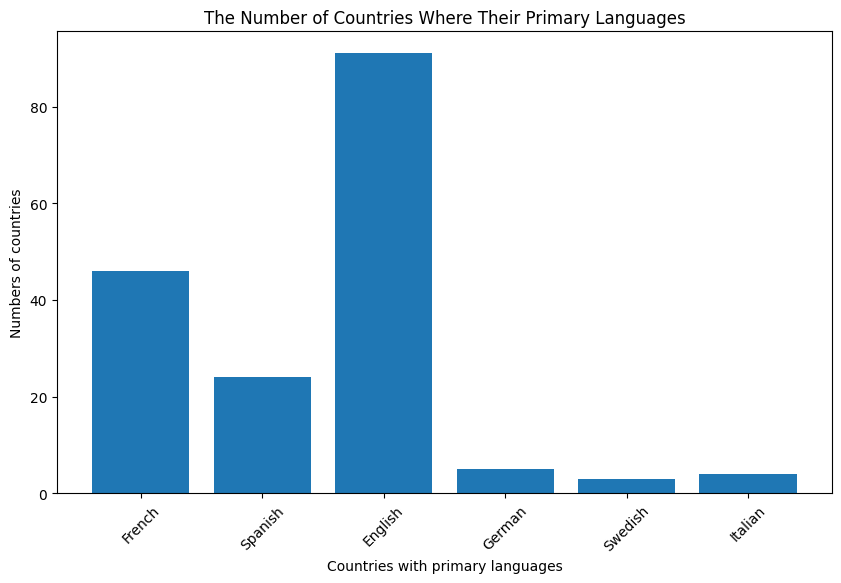

In [178]:
# 5. Create a histogram showing the number of countries that have English, Spanish, Italian, French, German, and Swedish as their primary language.
import matplotlib.pyplot as plt
from collections import Counter

primary_languages = {'eng': 'English', 'spa': 'Spanish', 'ita': 'Italian', 'fra': 'French', 'deu': 'German', 'swe': 'Swedish'}
countries_list = countries()
countries_languages = []
for country in countries_list:
    lang_intersect = country.languages.keys() & primary_languages.keys()
    for l in lang_intersect:
        lang_name = primary_languages[l]
        countries_languages.append(lang_name)

counts = Counter(countries_languages)

plt.figure(figsize = (10, 6))
plt.bar(counts.keys(), counts.values())
plt.xlabel('Countries with primary languages')
plt.ylabel('Numbers of countries')
plt.title('The Number of Countries Where Their Primary Languages')
plt.xticks(rotation = 45)
plt.show()

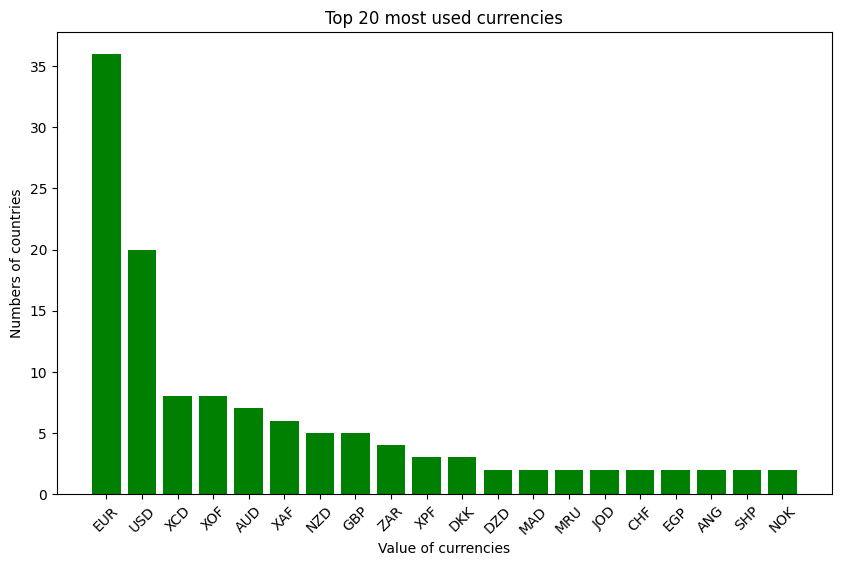

In [160]:
# 6. Create a histogram showing the top 20 most used currencies.

import matplotlib.pyplot as plt
from collections import Counter

countries_list = countries()

currencies_used_in_countries = [currency for country in countries_list for currency in country.currencies]
currencies_counts = Counter(currencies_used_in_countries)
top20 = dict(currencies_counts.most_common(20))


plt.figure(figsize = (10, 6))
plt.bar(top20.keys(), top20.values(), color='green')
plt.xlabel('Value of currencies')
plt.ylabel('Numbers of countries')
plt.title('Top 20 most used currencies')
plt.xticks(rotation = 45)
plt.show()